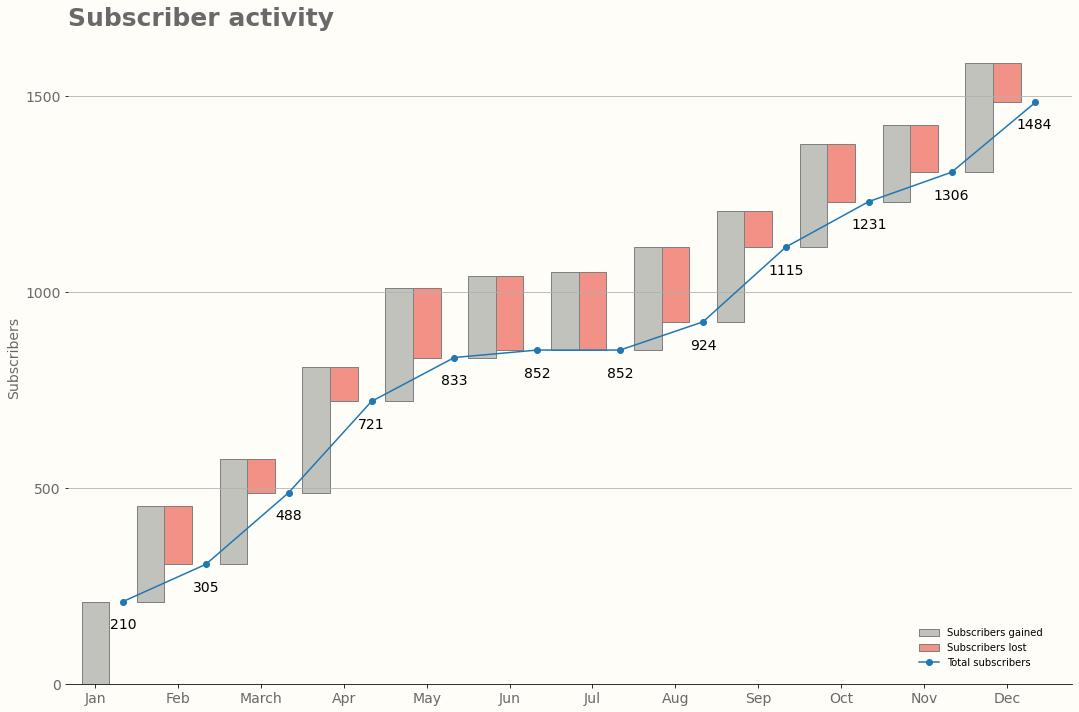

In [4]:
import matplotlib.pyplot as plt
import numpy as np

#months labels and the data into arrays
labels = ['Jan', 'Feb','March','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
usergain = np.array([210,245,270,320,290,209,200,263,282,264,195,280])
userloss = np.array([0,150,87,87,178,190,200,191,91,148,120,102])

width = 0.66
x = np.arange(len(labels))
x1=np.arange(0,18*width,18*width/12)

fig, ax = plt.subplots()
currentbottom=0
lossbottom=0
usersum=np.arange(len(labels))

ax.bar(x1[0]+width/2, usergain[0], width/2,bottom=0, color=(0.76,0.76,0.74,1),
       edgecolor='gray',align='center',label='Subscribers gained')
ax.bar(x1[0]+width/2, userloss[0], width/2,bottom=0, color=(0.95,0.57,0.52,1),
       edgecolor='gray',align='center',label='Subscribers lost')

for i in range(0, len(labels)-1):
    
    currentbottom+=(usergain[i]-userloss[i])
    usersum[i+1]=currentbottom
    lossbottom=(usergain[i+1]+currentbottom-userloss[i+1])
    p1=ax.bar(x1[i+1]-width/2, np.zeros_like(usergain[i+1]), width/2,
              bottom=currentbottom, fill=False,edgecolor='None')
    p2=ax.bar(x1[i+1], usergain[i+1], width/2,
              bottom=currentbottom, color=(0.76,0.76,0.74,1),edgecolor='gray')
    p3=ax.bar(x1[i+1]+width/2, userloss[i+1], width/2,
              bottom=lossbottom, color=(0.95,0.57,0.52,1),edgecolor='gray')
    ax.bar_label(p1,label_type='edge',fontsize=14,color='black',padding=-30)


last_value=str(int(currentbottom+usergain[len(labels)-1]-userloss[len(labels)-1]))

x2=x1[1:]
usersum2=usersum[1:]
x2=np.append(x2, x1[-1]+1)
usersum2=np.append(usersum2,usersum[-1]+usergain[-1]-userloss[-1])

p4=ax.plot(x2-width/2,usersum2, marker='o', label='Total subscribers')  

ax.set_xticks(x1+width/2)
ax.set_xticklabels(labels, fontsize=14, color='dimgray' )
ax.set_xlim(0,12)
ax.set_yticks([0,500,1000,1500])
ax.set_yticklabels([0,500,1000,1500],fontsize=14, color='dimgray' )
ax.set_ylim(bottom=0)
ax.set_ylabel('Subscribers',fontsize=14, color='dimgray' )
ax.grid(axis='y')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(False)

#Adding the Legend
handles, labels_legend = plt.gca().get_legend_handles_labels()
order = [1,2,0]
plt.legend([handles[idx] for idx in order],[labels_legend[idx] for idx in order], fontsize=10,
           frameon = False,bbox_to_anchor=(0.98,0.1)) 


fig.set_size_inches(18, 12)
fig.set(facecolor=(0.996,0.992,0.968,1))
ax.set_facecolor(color=(0.996,0.992,0.968,1))
plt.gca().set_title('Subscriber activity', fontsize=25, fontweight ='bold', loc='left', color='dimgray')
plt.text(x1[len(labels)-1]+width/1.5, currentbottom+usergain[len(labels)-1]-userloss[len(labels)-1]-65, last_value,fontsize=14,color='black')



plt.savefig('hat_chart2.png',dpi=600)
plt.show()